In [21]:
#********************************************************************************
#* Author: Yoseph Mamo
#* Creation Date: May 01, 2019
#* Purpose: Analyze employee reviews from big 6 companies like Amazon, netflix, fb ...
#*          Program reads the file employeeReviews.csv into a data frame,
#*          and displays table's and graphs based on several analyzed values.
#*          
#*
#* 
#*******************************************************************************


    
# For this project I will  be working with a data frame that contains Over 67k employee reviews for the Big Companies like Google, Amazon, Facebook, Apple, Microsoft, and Netflix. 

# Source of The Data Set
https://www.kaggle.com/petersunga/google-amazon-facebook-employee-reviews

## According to the source this reviews where web scraped from Glassdoor.com

# The Columns:


    index                      : companyCompany Name
    location                   :Location of Company(May include country)
    dates                      :Date   
    job-title                  :Job Title
    summary                    :Summary of Employee Review
    pros                       :Employee Review (Pros)
    cons                       :Employee Review (Cons)
    advice-to-mgmt             :Advice to Management
    overall-ratings            :Overall Rating (1-5)
    work-balance-star          :sWork/Life Balance Rating (1-5)
    culture-values-stars       : Culture and Values Rating (1-5)
    carrer-opportunities-stars : Career Opportunities Rating (1-5)
    comp-benefit-stars         :Comp & Benefits Rating (1-5)
    senior-mangemnet-stars     :Senior Management Rating (1-5)
    
# Reason ?  

# Using this dataset I want to know which company is the most ideal place to work for based on employee reviews and other statistics.


# Import Usefull Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

# Read In the Data From The File

In [2]:
df = pd.read_csv('employeeReviews.csv')
del df['Unnamed: 0']

# To Start I will retrieve a data frame that contains the following information for each company
### 1. The Total number of reviews 
### 2. The average overall ratings
### 3. The average work balance stars
### 4. The average compensation stars



In [9]:
# Create a dataFrame filter and store data to work on 
new = df[['company', 'overall-ratings', 'work-balance-stars', 'culture-values-stars']].copy()

In [10]:
# Some Data Cleansing: The Original data had 'none' ratings a string not a numeric value
# Lets transform this string to a numeric value or np.nan, then we can easily drop the records with that value

newDf.replace(to_replace=[None], value=np.nan, inplace=True) # Just In Case ( np.nan is numeric 'None' not always)
newDf.replace('none', value=np.nan, inplace=True) # Replace it to np.nan
newDf = newDf.dropna() # Drop the records with nan value 
new_comp_col = newDf['company'] # make a copy of the first column 

del newDf['company'] # Remove company column(its a string, I'm trying to convert the entire dataset to numric)

newDf = newDf.apply(pd.to_numeric) # COnvert entire dataset to numeric 

newDf['company'] = new_comp_col # Add the column back 

average_stars = newDf.groupby(['company']).agg('mean') # get the average stars of each company 

# Sort the data By overall ratings
average_stars.sort_values(by=['overall-ratings'], ascending=False, inplace = True )
average_stars.reset_index(inplace = True)

average_stars

,company,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars
0,facebook,4.518081,3.904729,4.515299,4.365090,4.573018,4.260779
1,google,4.378480,4.004104,4.359208,4.030692,4.427552,3.871877
2,apple,3.958919,3.338017,4.097873,3.419399,4.059036,3.446916
3,microsoft,3.859934,3.575086,3.657359,3.710211,4.025453,3.185432
4,amazon,3.605707,3.010915,3.532292,3.621241,3.710779,3.171875
5,netflix,3.497976,3.210526,3.514170,3.157895,4.257085,3.192308


# I will Plot the above data using a bar char for better visualization and only focus on the first four columns.

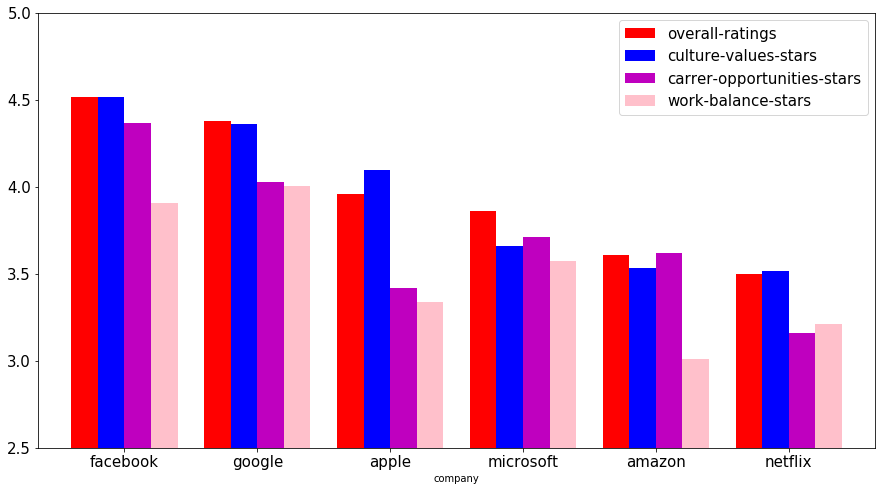

In [16]:
lables = list(average_stars['company'])

#ax = average_stars.plot(kind = 'bar', figsize = (15,10))
#plt.ylim((2,6))

colors = ['red','b','m','pink']

temp_df = average_stars.iloc[:, 0:5]

#temp_df.plot(kind='bar')
#plt.ylim((2,6))
temp_df= temp_df[[ 'company','overall-ratings', 'culture-values-stars', 'carrer-opportunities-stars', 'work-balance-stars']]


temp_df.set_index('company', inplace =True)
temp_df.plot(kind = 'bar', rot = 0, figsize=(15,8), width=0.8, fontsize=15, color=colors)

plt.legend(fontsize=15)
plt.ylim((2.5,5));



# Most people say that positive reviews make them trust a local business more, and that It is very likely  that employees will want to work for a local business if it has at least 4 stars or more.  

# Facebook has the highest Overall-Ratings, Culture-value-stars and career-opportunities-stars. looks like the ideal place to work for so far. 



# A closer look at the Employees.

# Which Job Titles Have Highest Overall Ratings per Company

In [17]:
# select data to work on from the main df
newDf = pd.DataFrame()
newDf['company']          = df['company']
newDf['Job-Title']        = df['job-title']
newDf['Overall-Ratings']  = df['overall-ratings']

x = pd.DataFrame();

# Count the number of occurences of each Job-Title (p is job_title_review_counts)
p = newDf.groupby(['company', 'Job-Title']).count()
p.reset_index(inplace = True) # Reset the index
# Sort the result by company
p.sort_values('company', ascending = False, inplace=True)

# Get the Average of the overall-ratings from each job-title
x = df.groupby(['company','job-title']).mean()
x.reset_index(inplace = True) # Reset the index again

del x['helpful-count']# Remove unwanted column

#Sort them in the same order as the p data frame 
x.sort_values('company', ascending = False, inplace=True)

# once they are sorted in the same order, add the number of reviews to the ds that has the counts
x['Num-Reviews'] = p['Overall-Ratings']

# finaly sort them by the total number of reviews
x.sort_values('Num-Reviews', ascending = False, inplace = True)



# You may use these mask variables and access x[amazon] to see job titles and average ratings of each 
amazon    = x['company']  == 'amazon'
apple     = x['company']  == 'apple'
facebook  = x['company']  == 'facebook'
netflix   = x['company']  == 'netflix'

x.head(15)

,company,job-title,overall-ratings,Num-Reviews
137,amazon,Current Employee - Anonymous Employee,3.780667,6652
7535,microsoft,Current Employee - Anonymous Employee,3.967750,4155
2578,amazon,Former Employee - Anonymous Employee,3.290157,3891
4003,apple,Current Employee - Anonymous Employee,4.128881,2770
8799,microsoft,Former Employee - Anonymous Employee,3.770818,2762
4949,apple,Former Employee - Anonymous Employee,3.938884,2258
6193,google,Current Employee - Anonymous Employee,4.422153,2248
6924,google,Former Employee - Anonymous Employee,4.284702,1693
4782,apple,Current Employee - Specialist,4.110517,561
5588,apple,Former Employee - Specialist,4.000000,486


# As for the results, it was trending that reviews from former anonymous employees is lower rated than current anonymous employees. Additionally companies with hourly labor departments like amazon and netflix reported a very low rating for those job titles vs salaried positions having a higher education level. 



# A Closer look at the reviews!

# Lets see the pros and cons of the three most helpful reviews (based on the helpful count).

In [22]:
top_reviews = df.sort_values(by=['helpful-count'], ascending=False)

most_helpful_reviews = top_reviews[['company', 'pros', 'cons']]

print("# 1 Most Helpful Reviews") 
print("Pros:")
print(most_helpful_reviews[['pros']].values[0])
print("\n")
print("Cons:")
print(most_helpful_reviews[['cons']].values[0])
print("\n")

print("# 2 Most Helpful Reviews") 
print("Pros:")
print(most_helpful_reviews[['pros']].values[1])
print("\n")
print("Cons:")
print(most_helpful_reviews[['cons']].values[1])
print("\n")



print("# 3 Most Helpful Reviews") 
print("Pros:")
print(most_helpful_reviews[['pros']].values[2])
print("\n")
print("Cons:")
print(most_helpful_reviews[['cons']].values[2])
print("\n")
#string = most_helpful_reviews[['pros']].values[0]


# 1 Most Helpful Reviews
Pros:
['1) Food, food, food. 15+ cafes on main campus (MTV) alone. Mini-kitchens, snacks, drinks, free breakfast/lunch/dinner, all day, errr\'day.  2) Benefits/perks. Free 24:7 gym access (on MTV campus). Free (self service) laundry (washer/dryer) available. Bowling alley. Volley ball pit. Custom-built and exclusive employee use only outdoor sport park (MTV). Free health/fitness assessments. Dog-friendly. Etc. etc. etc.  3) Compensation. In ~2010 or 2011, Google updated its compensation packages so that they were more competitive.  4) For the size of the organization (30K+), it has remained relatively innovative, nimble, and fast-paced and open with communication but, that is definitely changing (for the worse).  5) With so many departments, focus areas, and products, *in theory*, you should have plenty of opportunity to grow your career (horizontally or vertically). In practice, not true.  6) You get to work with some of the brightest, most innovative and hard

#  Glad to see that most people endorse the quality of food in big companies, surprising to see that most people who work for Google don't have a good work-life balance, most employees hint there is a lot of Hard work and minimal breaks, yes as expected when you are working for the big 6!

"So there is a layer of intelligent individuals who are horrible managers and leaders. " 

As For Myself, Everyone that I have ever worked for has been a good manager. All of them were really supportive and helpful I hope that never changes and I never get a horrible manager. 

# How Many Reviews Did Each Company Recieve  ?

company
amazon       26430
apple        12950
facebook      1590
google        7819
microsoft    17930
netflix        810
Name: company, dtype: int64

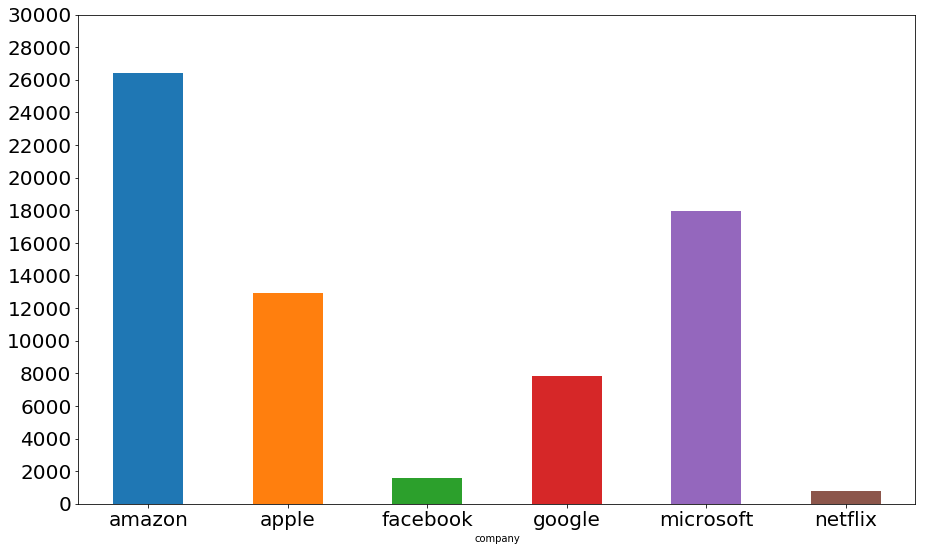

In [18]:
#review_counts = df.groupby('company').count().iloc[:, [1]]
review_counts = df.groupby('company')['company'].count()
ys = np.linspace(0,30000, 2000)
ax = review_counts.plot(kind = 'bar', rot=0, figsize =(15,9), fontsize=20)
ax.set_yticks(np.arange(0,32000,2000));
review_counts

# No wonder why the average ratings for facebook were up, not too many people from facebook contributed reviews for this data set! Amazon has the most reviews so if I analyze reviews from amazon I can get a better prediction because the larger the sample size the more information we have and so our uncertainty reduces. 


#  I'm going to focus on the reviews for Amazon since it has the most reviews in this dataset. 

# Firstly, I wanted to see out of all the reviews for Amazon ? 
##           How many reviews are given by current employee?  
##           How many reviews are given by Former employee? 

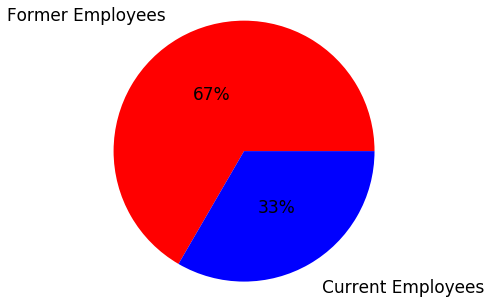

In [19]:
# Get the Amazon Reviews
mask = df['company'] == 'amazon'
amazon_reviews = df[mask]
# Select data to work on
amazon_reviews = amazon_reviews[['company', 'location', 'job-title', 'overall-ratings']]

# Split the job titles current and former employee
job_title = amazon_reviews["job-title"].str.split("-", n = 1, expand = True)

# The first column after split is job-tile[0] = (current or former)
amazon_reviews['job-title'] = job_title[0]

review_counts = amazon_reviews.groupby('job-title')['company'].count()

lables = ['Former Employees','Current Employees']
colors = ['r', 'b']

ax = plt.pie(review_counts,labels=lables,autopct='%1.0f%%', colors = colors, radius = 1.5,
             pctdistance=0.5, labeldistance=1.2, textprops={'fontsize': 17})

plt.title = 'Reviews for Amazon By Currrent and Former Employees'
#ax = review_counts.plot(kind = 'pie', rot = 0)

# Only 1/3 of the reviews came from Current Employees. The Majority of the reviews came from former employees.  



# Reviews by Role:

# Lets See the top six job titles that gave the most number of reviews?
 
# Considering both current and former employee for each job title. 

In [20]:

# Rename the columns
reviews_by_jobtitle = amazon_reviews.rename(columns={'job-title': 'Employee Title'})[['company']]

# job_title is the split column from above code
reviews_by_jobtitle['Job Title'] = job_title[1]


reviews_by_jobtitle = reviews_by_jobtitle.groupby('Job Title').count().sort_values(by=['company'], ascending=False )

reviews_by_jobtitle.reset_index(inplace=True)

# Rename Columns
reviews_by_jobtitle.columns = ['Job-Title', 'Num-Reviews']

# Display the top 6
reviews_by_jobtitle.head(6)



,Job-Title,Num-Reviews
0,Anonymous Employee,10543
1,Warehouse Associate,678
2,Fulfillment Associate,602
3,Software Development Engineer,593
4,Area Manager,315
5,Software Development Engineer II,273


# Reviews by Role: (Continued)

## The most amount of reviews were anonymous however, of those who disclosed their role in the company the majority were Warehouse Associates, a pie chart will help visualize things better.

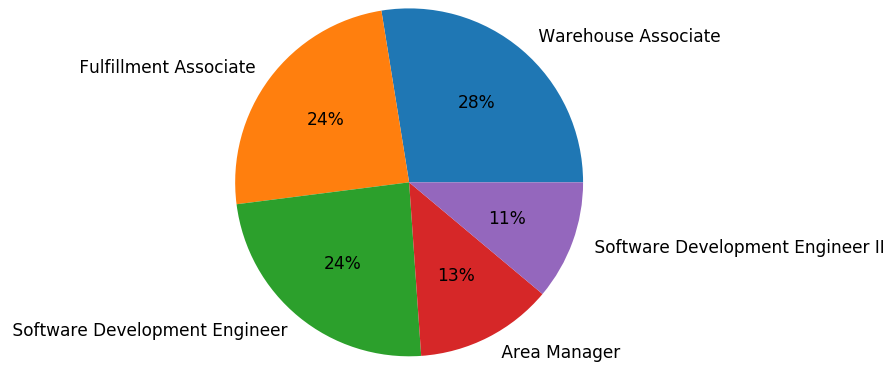

In [26]:
#new_reviews = reviews_by_jobtitle.iloc[1:]

new_reviews = reviews_by_jobtitle.head(6)
new_reviews = new_reviews.iloc[1:]

new_reviews.reset_index(inplace = True)

# Get a lisst of the col names
index1 = new_reviews.index.values

lables = list(new_reviews['Job-Title'])


ax = plt.pie(new_reviews['Num-Reviews'], labels=lables, autopct='%1.0f%%', 
             radius =2, textprops={'fontsize': 17});



# lets see a data frame that contains the number of reviews (For Amazon) for each month of each year. Which month from a given year and which Year had the most reviews by an employee (both current and former)


In [27]:

from datetime import datetime

mask = df['company'] == 'amazon' 

company_reviews = df[['company','dates']]

amazon_reviews = company_reviews[mask]

del amazon_reviews['company']


# Some Data Cleansing, Had '0000' values for a year and some none values ...
amazon_reviews.replace(to_replace=[None], value=np.nan, inplace=True) # Just In Case ( np.nan is numeric 'None' not always)
amazon_reviews.replace('None', value=np.nan, inplace=True) # Replace it to np.nan
amazon_reviews.replace('0000', value=np.nan, inplace=True) # Replace it to np.nan
amazon_reviews = amazon_reviews.dropna() # Drop the records with nan value 

# Split the location for ex currently : (Mountain View, CA) into just CA to get the state only 
amazon_reviews['dates'] = amazon_reviews['dates'].map(lambda x: x.replace(',', ''))
#amazon_reviews['dates'] = amazon_reviews['dates'].map(lambda x: x.replace(' ', '-'))
#amazon_reviews['dates'] = amazon_reviews['dates'].map(lambda x: x.lstrip('-'))

date_list1 = amazon_reviews['dates']

date_list1 = date_list1.str.split(" ", n = 3, expand = True)

reviews_by_year = date_list1.groupby([3,1]).count().unstack(level=-1)


reviews_by_year = reviews_by_year.dropna()
reviews_by_year  = reviews_by_year.astype(int)

x = reviews_by_year[0].reset_index()

x

1,3,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2009,27,5,8,8,28,19,10,19,11,10,11,12
1,2010,13,15,11,17,17,13,21,16,15,8,12,10
2,2011,29,28,25,15,14,27,19,16,15,15,16,36
3,2012,39,59,53,32,25,44,64,29,39,58,50,60
4,2013,68,75,78,54,74,69,45,69,62,69,75,80
5,2014,115,124,119,105,86,131,103,134,113,126,135,114
6,2015,203,385,231,157,187,314,281,171,270,327,314,360
7,2016,329,381,355,363,374,307,322,351,308,368,478,450
8,2017,427,507,694,426,512,451,471,423,538,785,872,1096
9,2018,582,819,214,739,782,728,704,686,621,642,768,769


# Data looks fairly distributed. Relative to the ratings of each year there is no month with an unexpected increase or drop in the number of reviews. I expected to see the number of reviews to grow every year as technology strives, and more and more reviews are done online these days.


# Next, There are Amazon reviews from different states. Lets see the top 10 states with the most number of reviews and their average overall rating ( output may include results from other states from different countries since this data is global) 

In [28]:
mask = df['company'] == 'amazon'
amazon_reviews = df[['company', 'location', 'overall-ratings']]

amazon_reviews = amazon_reviews[mask]

del amazon_reviews['company']


amazon_reviews.replace(to_replace=[None], value=np.nan, inplace=True) # Just In Case ( np.nan is numeric 'None' not always)
amazon_reviews.replace('none', value=np.nan, inplace=True) # Replace it to np.nan
amazon_reviews = amazon_reviews.dropna() # Drop the records with nan value 
#yearly_count = yearly_count['company'] # make a copy of the first column 

#del newDf['company'] # Remove company column(its a string, I'm trying to convert the entire dataset to numric)
#job_title = amazon_reviews["job-title"].str.split("-", n = 1, expand = True)

state = amazon_reviews['location'].str.split(",", n=1, expand = True)

amazon_reviews['location'] = state[1] # State the new location 

state_reviews = amazon_reviews.groupby('location').agg(['count', 'mean']).sort_values(by=[('overall-ratings', 'count')],ascending=False)

state_reviews.head(10)



overall-ratings          
                        count      mean
location                               
 WA                      4270  3.550820
 CA                      1103  3.379873
 TX                       712  3.363764
 England (UK)             518  3.465251
 KY                       375  3.224000
 PA                       362  3.174033
 NJ                       361  3.163435
 FL                       342  3.327485
 VA                       333  3.378378
 TN                       325  3.107692

Since Amazon's headquarters is located in seattle, WA, it makes sence that most reviews came from there. Amazon now occupies a mind-boggling 19 percent of all prime office space in the city.

# " Amazon so dominates Seattle that it has as much office space as the city’s next 40 biggest employers combined. And the growth continues: Amazon’s Seattle footprint of 8.1 million square feet is expected to soar to more than 12 million square feet within five years. " 

By Mike Rosenberg and Ángel González
Seattle Times business reporters



# Conclusions 

The data has many issues one being data including 'none' values for review stars and other "bad symbols" (%$##&) inside several field names. Dealing with such issues consumed a lot of time. I'm glad to figure out the 'reset_index()' function call it wsa a life saver!. After working on this project I was able to grasp a better understanding of how to use the pandas library and get desired information out of a large data set and present that information in a visual way by using tables and different graph types.

After reviewing this dataset, My goal was to find out which comapny was the most ideal place to work for among the
big 6 tech companies in the U.S.. Well since I only focused on amazon I was not able to draw a solid conclusion on which company was the best.(Although I prefer to work for Google).I was able to see which companies have higher reviews, better enviroment for employees(including better food) and which companies value their employees, how they value their culture, their senior status and if they promote good career opportunities based on the employee reviews. Things that I never thought of when I did my internship research.Final note; working for big companies like Amazon, Facebook, Google netflix or any other big company is going to be a huge task and a never ending challenge, something that I prize and respect. 

Check out this link, It's a blog about "10 things I wish I knew on my first day at Google" by Omid Scheybani 

https://medium.com/@moonstorming/10-things-i-wish-i-knew-on-my-first-day-at-google-107581d87286